In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import seaborn as sns

In [5]:
data = pd.read_csv("data\eurusd_hour.csv")
data.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93084 entries, 0 to 93083
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93084 non-null  object 
 1   Time    93084 non-null  object 
 2   BO      93084 non-null  float64
 3   BH      93084 non-null  float64
 4   BL      93084 non-null  float64
 5   BC      93084 non-null  float64
 6   BCh     93084 non-null  float64
 7   AO      93084 non-null  float64
 8   AH      93084 non-null  float64
 9   AL      93084 non-null  float64
 10  AC      93084 non-null  float64
 11  ACh     93084 non-null  float64
dtypes: float64(10), object(2)
memory usage: 8.5+ MB


In [3]:
df_1 = data[['Date', 'Time', 'BC']]

In [4]:
df_1.head()

,Date,Time,BC
0,2005-05-02,00:00,1.2844
1,2005-05-02,01:00,1.2842
2,2005-05-02,02:00,1.2851
3,2005-05-02,03:00,1.2851
4,2005-05-02,04:00,1.2855


In [53]:
df_1.index = pd.to_datetime(df_1['Date'] + '' + df_1['Time'], format='%Y-%m-%d%H:%M')

In [54]:
#df_1.index = df_1.index.strftime('%Y-%m-%d %H:%M')


In [55]:
df_1.columns

Index(['Date', 'Time', 'BC'], dtype='object')

In [56]:
df = df_1.copy()

In [57]:
df.drop(columns=['Date', 'Time'], inplace=True)

In [58]:
df

,BC
2005-05-02 00:00:00,1.28440
2005-05-02 01:00:00,1.28420
2005-05-02 02:00:00,1.28510
2005-05-02 03:00:00,1.28510
2005-05-02 04:00:00,1.28550
...,...
2020-04-29 18:00:00,1.08713
2020-04-29 19:00:00,1.08748
2020-04-29 20:00:00,1.08708
2020-04-29 21:00:00,1.08714


In [62]:
df = df.loc[df.index > "2015"]

In [63]:
df

,BC
2015-01-01 22:00:00,1.21009
2015-01-01 23:00:00,1.20866
2015-01-02 00:00:00,1.20669
2015-01-02 01:00:00,1.20667
2015-01-02 02:00:00,1.20577
...,...
2020-04-29 18:00:00,1.08713
2020-04-29 19:00:00,1.08748
2020-04-29 20:00:00,1.08708
2020-04-29 21:00:00,1.08714


In [71]:
first_day = df.index.min()
last_day = df.index.max()
last_day

Timestamp('2020-04-29 22:00:00')

In [73]:
full_range = pd.date_range(first_day, last_day, freq='H')
full_range.shape[0]

46681

In [75]:
differences = full_range.difference(df.index)

In [85]:
day_names = differences.day_name()

In [86]:
day_names.value_counts()

Saturday     6672
Sunday       5951
Friday        840
Monday        122
Wednesday      96
Tuesday        76
Thursday       63
Name: count, dtype: int64

In [89]:
df = df.reindex(full_range)

In [91]:
differences.shape[0]

13820

In [90]:
df.isna().sum()

BC    13820
dtype: int64

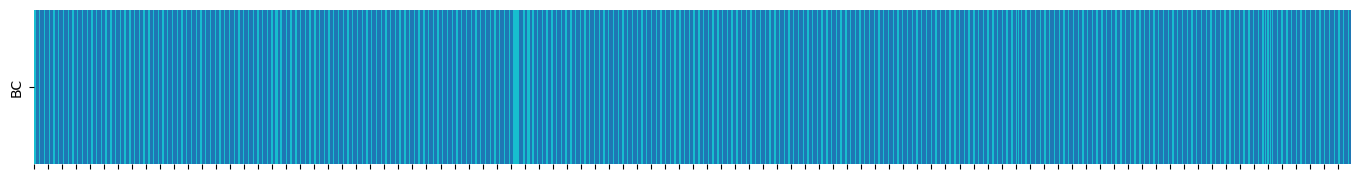

In [94]:
plt.figure(figsize=(17,2))
ax = sns.heatmap(df.isna().T, cmap="tab10" , cbar=False)
ax.set(xticklabels=[])
plt.show()

In [66]:
decomposition = tsa.seasonal_decompose(df, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None